<a href="https://colab.research.google.com/github/Chochoho/AIFFEL_quest_cr/blob/main/Project/10/Untitled23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

10-2

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
!ls /content/drive/MyDrive

'1. 김동이님_강의안(공유용) (1).gdoc'	     Pokemon.csv
'1. 김동이님_강의안(공유용).gdoc'	    '과학 프로젝트.gslides'
'1. 김동이님_강의안(공유용).pdf.gdrive'      다운로드.jpg
'2.김동이님_커리어 세미나 영상.mp4.gdrive'  '사진 앨범.gslides'
 cats_and_dogs_filtered			    '의 아이디어 소개하기 (1).gslides'
 Classroom				    '의 아이디어 소개하기.gslides'
'Colab Notebooks'			    '좋은 팀을 만드는 법 ver.1.gslides'
 KakaoTalk_20240530_054649333.jpg	     증명서-조현정.pdf
 mobilepresent				    '트루스 요가 .gdoc'


In [32]:
!ls /content/drive/MyDrive/cats_and_dogs_filtered/cats_and_dogs_filtered


train  validation  vectorize.py


In [35]:
!ls /content/drive/MyDrive/cats_and_dogs_filtered/cats_and_dogs_filtered/train

cats  dogs


In [38]:
import os

# Google Drive에 있는 압축 해제된 폴더 경로 설정
dataset_path = "/content/drive/MyDrive//cats_and_dogs_filtered/cats_and_dogs_filtered"

# 경로를 직접 사용하면 됨
train_cats_dir = os.path.join(dataset_path, "train/cats")
train_dogs_dir = os.path.join(dataset_path, "train/dogs")

print("✅ 데이터셋 경로:", dataset_path)
print("✅ 고양이 폴더 경로:", train_cats_dir)
print("✅ 강아지 폴더 경로:", train_dogs_dir)

# 폴더가 존재하는지 확인
if os.path.exists(train_cats_dir) and os.path.exists(train_dogs_dir):
    print("🐱 고양이 이미지 개수:", len(os.listdir(train_cats_dir)))
    print("🐶 강아지 이미지 개수:", len(os.listdir(train_dogs_dir)))
else:
    print("❌ 오류: 경로를 다시 확인하세요!")


✅ 데이터셋 경로: /content/drive/MyDrive//cats_and_dogs_filtered/cats_and_dogs_filtered
✅ 고양이 폴더 경로: /content/drive/MyDrive//cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats
✅ 강아지 폴더 경로: /content/drive/MyDrive//cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs
🐱 고양이 이미지 개수: 1000
🐶 강아지 이미지 개수: 1002


In [39]:
train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')
print(train_dir)
print(validation_dir)

/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/validation


In [40]:
# directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
print(train_cats_dir)

# directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_dogs_dir)

# directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
print(validation_cats_dir)

# directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_dogs_dir)

/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [43]:
path = "/content/drive/MyDrive/cats_and_dogs_filtered/cats_and_dogs_filtered"
train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')

In [45]:
import os

# 데이터셋 루트 경로 설정
path = "/content/drive/MyDrive/cats_and_dogs_filtered/cats_and_dogs_filtered"

# 훈련 및 검증 데이터셋 경로 설정
train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')

# 고양이 및 강아지 이미지 폴더 경로 설정
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# 이미지 개수 계산 및 출력
def count_images(dir_path, category):
    if os.path.exists(dir_path):
        num_images = len(os.listdir(dir_path))
        print(f'total {category} images:', num_images)
        return num_images
    else:
        print(f"❌ 오류: {category} 이미지 폴더를 찾을 수 없습니다!")
        return 0

num_cats_tr = count_images(train_cats_dir, 'training cat')
num_dogs_tr = count_images(train_dogs_dir, 'training dog')
num_cats_val = count_images(validation_cats_dir, 'validation cat')
num_dogs_val = count_images(validation_dogs_dir, 'validation dog')

print("--")

total_train = num_cats_tr + num_dogs_tr
print("Total training images:", total_train)
total_val = num_cats_val + num_dogs_val
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1002
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2002
Total validation images: 1000


In [46]:
num_cats_tr = len(os.listdir(train_cats_dir))
print('total training cat images:', num_cats_tr)
num_dogs_tr = len(os.listdir(train_dogs_dir))
print('total training dog images:', num_dogs_tr)

print("--")

num_cats_val = len(os.listdir(validation_cats_dir))
print('total validation cat images:', num_cats_val)
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('total validation dog images:', num_dogs_val)

print("--")

total_train = num_cats_tr + num_dogs_tr
print("Total training images:", total_train)
total_val = num_cats_val + num_dogs_val
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1002
--
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2002
Total validation images: 1000


In [47]:
# parameter Initialization
batch_size = 16
epochs = 5
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [48]:
# 데이터를 시각화하기 위한 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [49]:
# Training data generator
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.3,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     vertical_flip=False)

In [50]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2002 images belonging to 2 classes.


In [51]:
train_data_gen[0][0].shape

(16, 256, 256, 3)

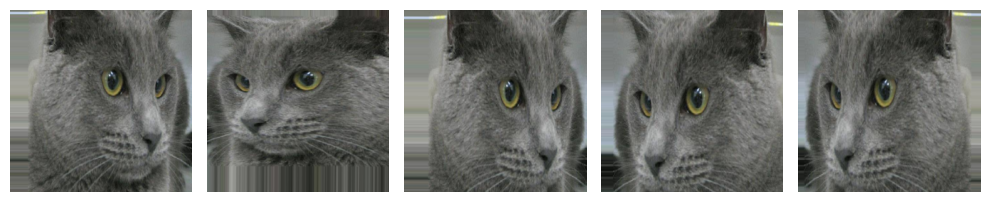

In [52]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [53]:
# Validation data generator
image_gen_val = ImageDataGenerator(rescale=1./255)

In [54]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


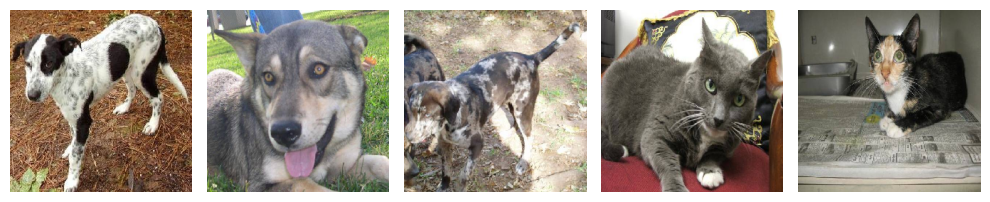

In [55]:
sample_training_images, _ = next(val_data_gen)
plotImages(sample_training_images[:5])

In [56]:
_[:5] # 정답 데이터

array([1., 1., 1., 0., 0.], dtype=float32)

In [57]:
import tensorflow as tf

# 입력층
input_layer = tf.keras.layers.Input(shape=(224, 224, 3))

# 블록 1: Conv2D(64) → Conv2D(64) → MaxPool
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool2D((2, 2), strides=2)(x)

# 블록 2: Conv2D(128) → Conv2D(128) → MaxPool
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool2D((2, 2), strides=2)(x)

# 블록 3: Conv2D(256) → Conv2D(256) → Conv2D(256) → MaxPool
x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool2D((2, 2), strides=2)(x)

# 블록 4: Conv2D(512) → Conv2D(512) → Conv2D(512) → MaxPool
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool2D((2, 2), strides=2)(x)

# 블록 5: Conv2D(512) → Conv2D(512) → Conv2D(512) → MaxPool
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool2D((2, 2), strides=2)(x)

# 완전연결층 (Fully Connected Layer)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(4096, activation='relu')(x)
x = tf.keras.layers.Dense(4096, activation='relu')(x)
x = tf.keras.layers.Dense(1000, activation='softmax')(x)  # 원본 VGG16 모델은 1000개 클래스 (ImageNet)

# 모델 생성
model = tf.keras.Model(inputs=input_layer, outputs=x)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)  # Binary Classification


In [59]:
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.01)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

# callbacks_list= [tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1)]
# callback 함수를 활용하고 싶다면 추가해서 학습하는 데에 활용해 보세요.

In [62]:
steps_per_epoch = int((len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir))) / batch_size)


In [65]:
train_cat_count = len(os.listdir(train_cats_dir))
train_dog_count = len(os.listdir(train_dogs_dir))
total_train = train_cat_count + train_dog_count

print(f"🐱 고양이 이미지 개수: {train_cat_count}")
print(f"🐶 강아지 이미지 개수: {train_dog_count}")
print(f"📊 전체 훈련 이미지 개수: {total_train}")
print(f"📦 배치 크기: {batch_size}")

# 정수 변환된 steps_per_epoch 값 확인
steps_per_epoch = total_train // batch_size
print(f"🧮 steps_per_epoch 값: {steps_per_epoch}")


🐱 고양이 이미지 개수: 1000
🐶 강아지 이미지 개수: 1002
📊 전체 훈련 이미지 개수: 2002
📦 배치 크기: 16
🧮 steps_per_epoch 값: 125


In [66]:
steps_per_epoch = max(total_train // batch_size, 1)
print(f"🔄 수정된 steps_per_epoch: {steps_per_epoch}")


🔄 수정된 steps_per_epoch: 125


In [69]:
import os

dataset_path = "/content/drive/MyDrive/cats_and_dogs_filtered/cats_and_dogs_filtered"

# 훈련 데이터 경로
train_cats_dir = os.path.join(dataset_path, "train/cats")
train_dogs_dir = os.path.join(dataset_path, "train/dogs")

# 검증 데이터 경로 추가 ✅
val_cats_dir = os.path.join(dataset_path, "validation/cats")
val_dogs_dir = os.path.join(dataset_path, "validation/dogs")

# 디버깅: 폴더가 있는지 확인
print("✅ 훈련 고양이 폴더:", train_cats_dir, "존재 여부:", os.path.exists(train_cats_dir))
print("✅ 훈련 강아지 폴더:", train_dogs_dir, "존재 여부:", os.path.exists(train_dogs_dir))
print("✅ 검증 고양이 폴더:", val_cats_dir, "존재 여부:", os.path.exists(val_cats_dir))
print("✅ 검증 강아지 폴더:", val_dogs_dir, "존재 여부:", os.path.exists(val_dogs_dir))


✅ 훈련 고양이 폴더: /content/drive/MyDrive/cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats 존재 여부: True
✅ 훈련 강아지 폴더: /content/drive/MyDrive/cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs 존재 여부: True
✅ 검증 고양이 폴더: /content/drive/MyDrive/cats_and_dogs_filtered/cats_and_dogs_filtered/validation/cats 존재 여부: True
✅ 검증 강아지 폴더: /content/drive/MyDrive/cats_and_dogs_filtered/cats_and_dogs_filtered/validation/dogs 존재 여부: True


In [71]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32  # 원하는 배치 크기 설정

# 데이터 증강을 포함한 ImageDataGenerator 설정
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # 픽셀 값을 0~1로 정규화
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)  # 검증 데이터는 정규화만 적용

# 데이터 생성기 (💡 target_size를 224x224로 설정)
train_data_gen = train_datagen.flow_from_directory(
    os.path.join(dataset_path, "train"),
    target_size=(224, 224),  # ✅ VGG16의 입력 크기에 맞춤
    batch_size=batch_size,
    class_mode='binary'
)

val_data_gen = val_datagen.flow_from_directory(
    os.path.join(dataset_path, "validation"),
    target_size=(224, 224),  # ✅ VGG16의 입력 크기에 맞춤
    batch_size=batch_size,
    class_mode='binary'
)


Found 2002 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [72]:
input_layer = tf.keras.layers.Input(shape=(224, 224, 3))  # ✅ 224x224로 수정


In [75]:
import tensorflow as tf

# 입력층
input_layer = tf.keras.layers.Input(shape=(224, 224, 3))

# 블록 1: Conv2D(64) → Conv2D(64) → MaxPool
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool2D((2, 2), strides=2)(x)

# 블록 2: Conv2D(128) → Conv2D(128) → MaxPool
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool2D((2, 2), strides=2)(x)

# 블록 3: Conv2D(256) → Conv2D(256) → Conv2D(256) → MaxPool
x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool2D((2, 2), strides=2)(x)

# 블록 4: Conv2D(512) → Conv2D(512) → Conv2D(512) → MaxPool
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool2D((2, 2), strides=2)(x)

# 블록 5: Conv2D(512) → Conv2D(512) → Conv2D(512) → MaxPool
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool2D((2, 2), strides=2)(x)

# 완전연결층 (Fully Connected Layer)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(4096, activation='relu')(x)
x = tf.keras.layers.Dense(4096, activation='relu')(x)

# 🚀 마지막 출력층 수정 (1000 → 1)
out_layer = tf.keras.layers.Dense(1, activation='sigmoid')(x)  # ✅ 수정됨

# 모델 생성
model = tf.keras.Model(inputs=input_layer, outputs=out_layer)
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,264,641 (512.18 MB)

 Trainable params: 134,264,641 (512.18 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='binary_crossentropy',  # ✅ 수정됨 (원래 categorical_crossentropy였으면 오류 발생 가능)
    metrics=['accuracy']
)


In [77]:
train_data_gen = train_datagen.flow_from_directory(
    os.path.join(dataset_path, "train"),
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'  # ✅ 이진 분류 (binary)
)

val_data_gen = val_datagen.flow_from_directory(
    os.path.join(dataset_path, "validation"),
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'  # ✅ 이진 분류 (binary)
)


Found 2002 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [78]:
history = model.fit(
      train_data_gen,
      steps_per_epoch=max((len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir))) // batch_size, 1),
      epochs=epochs,
      validation_data=val_data_gen,
      validation_steps=max((len(os.listdir(val_cats_dir)) + len(os.listdir(val_dogs_dir))) // batch_size, 1)
)


Epoch 1/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 257s 4s/step - accuracy: 0.5090 - loss: 0.7932 - val_accuracy: 0.4980 - val_loss: 0.6938
Epoch 2/5
 1/62 ━━━━━━━━━━━━━━━━━━━━ 27s 459ms/step - accuracy: 0.4062 - loss: 0.6999

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 59s 967ms/step - accuracy: 0.4062 - loss: 0.6999 - val_accuracy: 0.5000 - val_loss: 0.6937
Epoch 3/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 54s 694ms/step - accuracy: 0.4829 - loss: 0.6942 - val_accuracy: 0.4990 - val_loss: 0.6931
Epoch 4/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.2500 - loss: 0.6936 - val_accuracy: 0.5010 - val_loss: 0.6931
Epoch 5/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 82s 787ms/step - accuracy: 0.4901 - loss: 0.6932 - val_accuracy: 0.4980 - val_loss: 0.6932


In [80]:
print(history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [81]:
acc = history.history['accuracy']  # 'binary_accuracy' 대신 'accuracy' 사용
val_acc = history.history['val_accuracy']  # 'val_binary_accuracy' 대신 'val_accuracy'
loss = history.history['loss']
val_loss = history.history['val_loss']


📌 history.history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


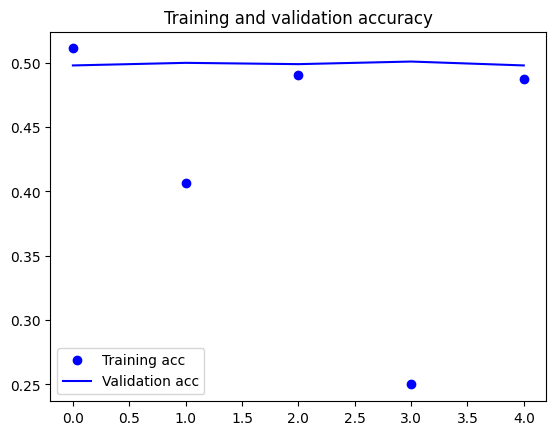

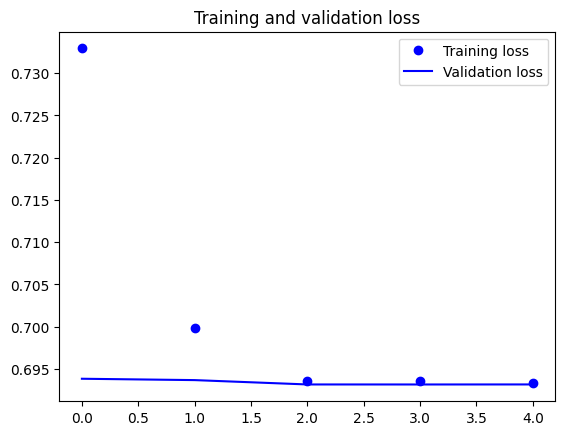

In [82]:
import matplotlib.pyplot as plt

# history.history에 저장된 키 확인
print("📌 history.history keys:", history.history.keys())

# 정확한 키 확인 후 수정
acc = history.history.get('accuracy', history.history.get('binary_accuracy', []))
val_acc = history.history.get('val_accuracy', history.history.get('val_binary_accuracy', []))
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [83]:
# Hyperparameter 설정
batch_size = 32            # 한 번에 학습할 데이터 개수
epochs = 10                # 전체 데이터셋 학습 반복 횟수
learning_rate = 0.0001     # Adam 옵티마이저 학습률
dropout_rate = 0.5         # 드롭아웃 비율 (과적합 방지)
momentum = 0.9             # SGD 옵티마이저 사용 시 Momentum 설정
weight_decay = 1e-4        # L2 Regularization (과적합 방지)


In [84]:
import tensorflow as tf

# 옵티마이저 설정 (Adam 사용)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# 모델 컴파일
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',  # 이진 분류를 위한 손실 함수
    metrics=['accuracy']
)


In [85]:
history = model.fit(
      train_data_gen,
      steps_per_epoch=max((len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir))) // batch_size, 1),
      epochs=epochs,
      validation_data=val_data_gen,
      validation_steps=max((len(os.listdir(val_cats_dir)) + len(os.listdir(val_dogs_dir))) // batch_size, 1)
)


Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 55s 754ms/step - accuracy: 0.4776 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - accuracy: 0.4688 - loss: 0.6932 - val_accuracy: 0.4980 - val_loss: 0.6932
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.5110 - loss: 0.6931 - val_accuracy: 0.5020 - val_loss: 0.6931
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.5938 - loss: 0.6931 - val_accuracy: 0.5010 - val_loss: 0.6931
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 97s 692ms/step - accuracy: 0.5227 - loss: 0.6931 - val_accuracy: 0.5030 - val_loss: 0.6931
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.4688 - loss: 0.6931 - val_accuracy: 0.4990 - val_loss: 0.6931
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 43s 692ms/step - accuracy: 0.4997 - loss: 0.6932 - val_accuracy: 0.5020 - val_loss: 0.6931
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.3750 - loss: 0.6932 - val_accuracy: 0.4

In [86]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 하이퍼파라미터
batch_size = 32
image_size = (224, 224)  # VGG16의 기본 입력 크기
train_dir = os.path.join(dataset_path, "train")  # 훈련 데이터 경로
val_dir = os.path.join(dataset_path, "validation")  # 검증 데이터 경로

# 🔹 훈련 데이터 제너레이터 (Data Augmentation 적용)
train_datagen = ImageDataGenerator(
    rescale=1.0/255,          # 픽셀 값을 0~1 사이로 정규화
    rotation_range=20,        # 회전 범위 (최대 ±20도)
    width_shift_range=0.2,    # 가로 이동 (최대 20%)
    height_shift_range=0.2,   # 세로 이동 (최대 20%)
    shear_range=0.2,          # 이미지 왜곡
    zoom_range=0.2,           # 확대/축소
    horizontal_flip=True,     # 좌우 반전
    fill_mode='nearest'       # 빈 공간을 가까운 픽셀로 채움
)

# 🔹 검증 데이터 제너레이터 (Data Augmentation 없이 정규화만 적용)
val_datagen = ImageDataGenerator(rescale=1.0/255)

# 🔹 데이터 로드 (train)
train_data_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,  # (224, 224)로 리사이즈
    batch_size=batch_size,
    class_mode='binary'  # 이진 분류 문제이므로 'binary' 사용
)

# 🔹 데이터 로드 (validation)
val_data_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)


Found 2002 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [87]:
history = model.fit(
      train_data_gen,
      steps_per_epoch=max(len(train_data_gen) // batch_size, 1),
      epochs=epochs,
      validation_data=val_data_gen,
      validation_steps=max(len(val_data_gen) // batch_size, 1)
)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2500 - loss: 0.6933 - val_accuracy: 0.6562 - val_loss: 0.6931
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step - accuracy: 0.7222 - loss: 0.6930 - val_accuracy: 0.3438 - val_loss: 0.6932
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4688 - loss: 0.6932 - val_accuracy: 0.5938 - val_loss: 0.6931
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step - accuracy: 0.6562 - loss: 0.6931 - val_accuracy: 0.6250 - val_loss: 0.6931
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 882ms/step - accuracy: 0.4375 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5625 - loss: 0.6931 - val_accuracy: 0.4688 - val_loss: 0.6932
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3750 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 9

In [88]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input

# 🔹 VGG16 기본 모델 불러오기 (사전 학습된 가중치 사용, Fully Connected Layer 제외)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 🔹 VGG16의 기존 레이어를 학습되지 않도록 고정 (Feature Extraction)
base_model.trainable = False  # ❌ 기존 가중치를 유지하고 훈련되지 않도록 설정

# 🔹 새로운 Fully Connected Layer 추가 (이진 분류를 위한 커스텀 레이어)
x = Flatten()(base_model.output)   # CNN 출력을 1차원으로 변환
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)                # 과적합 방지
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)  # 🎯 최종 이진 분류

# 🔹 새로운 모델 생성
model = Model(inputs=base_model.input, outputs=x)

# 🔹 모델 컴파일
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 🔹 모델 요약 출력
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,264,641 (512.18 MB)

 Trainable params: 119,549,953 (456.05 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [89]:
history = model.fit(
      train_data_gen,
      steps_per_epoch=max(len(train_data_gen) // batch_size, 1),
      epochs=epochs,
      validation_data=val_data_gen,
      validation_steps=max(len(val_data_gen) // batch_size, 1)
)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.3750 - loss: 0.7883 - val_accuracy: 0.4688 - val_loss: 1.4142
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 848ms/step - accuracy: 0.5312 - loss: 1.3073 - val_accuracy: 0.3438 - val_loss: 1.5565
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step - accuracy: 0.4688 - loss: 1.3141 - val_accuracy: 0.5000 - val_loss: 0.6413
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step - accuracy: 0.5312 - loss: 0.8303 - val_accuracy: 0.5938 - val_loss: 1.0283
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step - accuracy: 0.5625 - loss: 1.2528 - val_accuracy: 0.7188 - val_loss: 0.6843
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step - accuracy: 0.5938 - loss: 0.9908 - val_accuracy: 0.8125 - val_loss: 0.4969
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6562 - loss: 0.6241 - val_accuracy: 0.4062 - val_loss: 1.6385
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step - accuracy: 0.4062 - loss: 1.3664 - val_accuracy: 0.5000 - val_loss: 1.155

In [90]:
import tensorflow as tf

# 🔹 옵티마이저 설정
learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)  # Adam 사용

# 🔹 손실 함수 (Loss Function)
loss_function = 'binary_crossentropy'  # 🎯 이진 분류 문제이므로 binary_crossentropy 사용

# 🔹 평가 지표 (Metric)
metrics = ['accuracy']  # 🎯 분류 문제에서는 정확도(Accuracy)를 주로 사용

# 🔹 모델 컴파일
model.compile(
    optimizer=optimizer,
    loss=loss_function,
    metrics=metrics
)

# 모델 컴파일 완료 메시지 출력
print("✅ 모델 컴파일 완료!")


✅ 모델 컴파일 완료!


In [91]:
history = model.fit(
      train_data_gen,
      steps_per_epoch=max(len(train_data_gen) // batch_size, 1),
      epochs=epochs,
      validation_data=val_data_gen,
      validation_steps=max(len(val_data_gen) // batch_size, 1)
)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.3889 - loss: 1.0497 - val_accuracy: 0.3125 - val_loss: 2.5625
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 1.6729 - val_accuracy: 0.6250 - val_loss: 0.5631
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step - accuracy: 0.8125 - loss: 0.4340 - val_accuracy: 0.5938 - val_loss: 0.9049
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step - accuracy: 0.5938 - loss: 1.1336 - val_accuracy: 0.6562 - val_loss: 0.7004
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step - accuracy: 0.5000 - loss: 1.1075 - val_accuracy: 0.8438 - val_loss: 0.4513
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step - accuracy: 0.4375 - loss: 0.8086 - val_accuracy: 0.5625 - val_loss: 1.3875
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5938 - loss: 0.9707 - val_accuracy: 0.5000 - val_loss: 1.3731
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step - accuracy: 0.6250 - loss: 1.0066 - val_accuracy: 0.6562 - val_loss: 0.5685

In [93]:
history = model.fit(
      train_data_gen,
      steps_per_epoch=int((len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir))) / batch_size),  # 🚀 정수 변환
      epochs=epochs,
      validation_data=val_data_gen,
      validation_steps=int((len(os.listdir(val_cats_dir)) + len(os.listdir(val_dogs_dir))) / batch_size)  # 🚀 정수 변환
)


Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 37s 596ms/step - accuracy: 0.6480 - loss: 0.8810 - val_accuracy: 0.8669 - val_loss: 0.2954
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.7812 - loss: 0.3520 - val_accuracy: 0.7762 - val_loss: 0.4634
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 37s 592ms/step - accuracy: 0.7434 - loss: 0.5326 - val_accuracy: 0.8952 - val_loss: 0.2516
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.7188 - loss: 0.5315 - val_accuracy: 0.9173 - val_loss: 0.2263
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 82s 676ms/step - accuracy: 0.8167 - loss: 0.4131 - val_accuracy: 0.8931 - val_loss: 0.2448
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.7500 - loss: 0.4112 - val_accuracy: 0.9073 - val_loss: 0.2258
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 657ms/step - accuracy: 0.8471 - loss: 0.3548 - val_accuracy: 0.9234 - val_loss: 0.2035
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 1.0000 - loss: 0.0844 - val_accuracy: 0.

In [95]:
print(history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [96]:
acc = history.history.get('accuracy', history.history.get('binary_accuracy', []))
val_acc = history.history.get('val_accuracy', history.history.get('val_binary_accuracy', []))
loss = history.history['loss']
val_loss = history.history['val_loss']


📌 history.history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


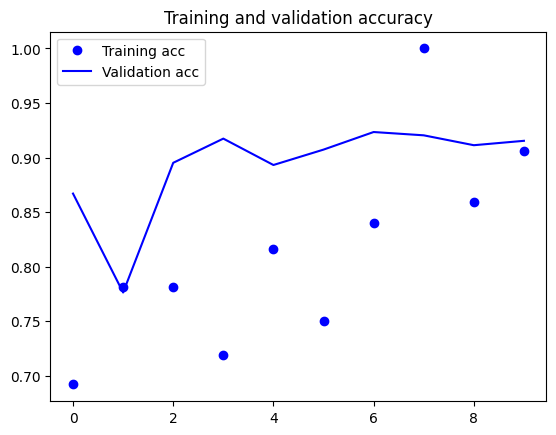

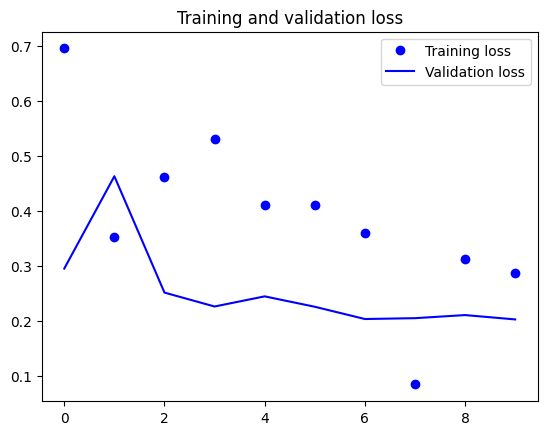

In [97]:
import matplotlib.pyplot as plt

# history.history에 저장된 키 확인
print("📌 history.history keys:", history.history.keys())

# 정확한 키 확인 후 적용
acc = history.history.get('accuracy', history.history.get('binary_accuracy', []))
val_acc = history.history.get('val_accuracy', history.history.get('val_binary_accuracy', []))
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


10-3

In [98]:
!pip3 install tensorflow-estimator==2.6.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.9/462.9 kB 8.6 MB/s eta 0:00:00


In [99]:
# Tensorflow와 Tensoflow Hub에 있는 이미 학습된 모델을 활용하기 위한 모듈
import tensorflow as tf
import tensorflow_hub as hub

# 이미지를 다운로드하는 데에 사용하는 모듈
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO

# 이미지에 선과 폰트를 넣기 위한 모듈
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# Detection하는 데에 소요된 시간을 점검하기 위한 모듈
import time

In [100]:
def display_image(image):
  fig = plt.figure(figsize=(20, 15))
  plt.grid(False)
  plt.imshow(image)

In [101]:
def download_and_resize_image(url, new_width=256, new_height=256, display=False):

  _, filename = tempfile.mkstemp(suffix=".jpg")
  response = urlopen(url)
  image_data = response.read()
  image_data = BytesIO(image_data)  # 이미지 읽기
  pil_image = Image.open(image_data)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS) # 이미지 조정
  pil_image_rgb = pil_image.convert("RGB") #RBG로 변환
  pil_image_rgb.save(filename, format="JPEG", quality=90) # 이미지 저장
  print("Image downloaded to %s." % filename)
  if display:
    display_image(pil_image)
  return filename

In [102]:
def draw_bounding_box_on_image(image,
                               ymin, xmin, ymax, xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):

  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                ymin * im_height, ymax * im_height)

# BBox 테두리 그리기
  draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
             (left, top)],
            width=thickness,
            fill=color)

  display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]

  total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

  if top > total_display_str_height:
    text_bottom = top
  else:
    text_bottom = top + total_display_str_height

  for display_str in display_str_list[::-1]:
    text_width, text_height = font.getsize(display_str)
    margin = np.ceil(0.05 * text_height)
    draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                    (left + text_width, text_bottom)],
                   fill=color)
    draw.text((left + margin, text_bottom - text_height - margin),
              display_str,
              fill="black",
              font=font)
    text_bottom -= text_height - 2 * margin

In [103]:
# BBox 그리기
def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.1):
  colors = list(ImageColor.colormap.values())

  try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                              25)
  except IOError:
    print("Font not found, using default font.")
    font = ImageFont.load_default()

# BBox 그리기 적용
  for i in range(min(boxes.shape[0], max_boxes)):
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])  # 박스 좌표값
      display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                     int(100 * scores[i]))
      color = colors[hash(class_names[i]) % len(colors)]
      image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
      draw_bounding_box_on_image(
          image_pil,
          ymin,
          xmin,
          ymax,
          xmax,
          color,
          font,
          display_str_list=[display_str])
      np.copyto(image, np.array(image_pil))
  return image

In [105]:
from PIL import Image, ImageOps
import requests
from io import BytesIO

def download_and_resize_image(url, new_width, new_height, display=False):
    filename = "downloaded_image.jpg"

    # URL에서 이미지 다운로드
    image_data = requests.get(url).content
    image_data = BytesIO(image_data)  # 이미지 읽기
    pil_image = Image.open(image_data)

    # ✅ 변경된 코드 (Image.ANTIALIAS → Image.Resampling.LANCZOS)
    pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.Resampling.LANCZOS)

    # RGB로 변환 후 저장
    pil_image_rgb = pil_image.convert("RGB")
    pil_image_rgb.save(filename, format="JPEG", quality=90)

    # 이미지 표시 (선택 사항)
    if display:
        pil_image_rgb.show()

    return filename

# 테스트 실행
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Torneo_beach_handball.jpg/640px-Torneo_beach_handball.jpg"
downloaded_image_path = download_and_resize_image(image_url, 1280, 856, True)


In [106]:
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"

detector = hub.load(module_handle).signatures['default'] # detector에 사용할 모듈 저장

In [107]:
def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img

In [108]:
def run_detector(detector, path):
  img = load_img(path)

  converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]

# 소요시간 측정
  start_time = time.time()
  result = detector(converted_img)
  end_time = time.time()

  result = {key:value.numpy() for key,value in result.items()}

# 이미지 추론 개수와 추론 시간 출력
  print("Found %d objects." % len(result["detection_scores"]))
  print("Inference time: ", end_time-start_time)

# 이미지 내 박스로 entity, scores를 추가하여 출력
  image_with_boxes = draw_boxes(
      img.numpy(), result["detection_boxes"],
      result["detection_class_entities"], result["detection_scores"])

  display_image(image_with_boxes)

In [111]:
from PIL import ImageFont

def draw_text_on_image(image, display_str_list, font_path="arial.ttf", font_size=20):
    font = ImageFont.truetype(font_path, font_size)

    # ✅ getsize() → textbbox()로 수정
    display_str_heights = [font.textbbox((0, 0), ds)[3] - font.textbbox((0, 0), ds)[1] for ds in display_str_list]

    # 이후 코드 정상 실행 가능
    total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)
    print(f"Total text height: {total_display_str_height}")

